<a href="https://colab.research.google.com/github/shubhs27/500107856_Predictive-Analytics-Lab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kukuroo3/body-performance-data")

print("Path to dataset files:", path)

# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

# Load a CSV file from the dataset (assuming it's named 'bodyPerformance.csv')
file_path = os.path.join(path, 'bodyPerformance.csv')
df = pd.read_csv(file_path)

# Inspect the data
print(df.head())
print(df.info())

100%|██████████| 249k/249k [00:00<00:00, 18.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kukuroo3/body-performance-data/versions/15
Files in dataset: ['bodyPerformance.csv']
    age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB
None


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

central_tendency = {
    "Mean": df.mean(numeric_only=True),
    "Median": df.median(numeric_only=True),
    "Mode": df.mode().iloc[0]
}

print("Measures of Central Tendency:")
print(central_tendency)


Measures of Central Tendency:
{'Mean': age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64, 'Median': age                         32.0
height_cm                  169.2
weight_kg                   67.4
body fat_%                  22.8
diastolic                   79.0
systolic                   130.0
gripForce                   37.9
sit and bend forward_cm     16.2
sit-ups counts              41.0
broad jump_cm              193.0
dtype: float64, 'Mode': age                         21.0
gender                         M
height_cm                  170.0
weight_kg                   70.5
body fat_%                  23.1
diastolic                   80.0
sys

In [ ]:
# 1.2 Measure of Dispersion
dispersion = {
    "Variance": df.var(numeric_only=True),
    "Standard Deviation": df.std(numeric_only=True),
    "Skewness": df.skew(numeric_only=True),
    "Range": df.max(numeric_only=True) - df.min(numeric_only=True),
    "IQR": df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True),
    # Calculate Mean Absolute Deviation (MAD)
    "mad": df.select_dtypes(include=[np.number]).apply(lambda x: np.mean(np.abs(x - np.mean(x))))


}

print("\nMeasures of Dispersion:")
print(dispersion)


Measures of Dispersion:
{'Variance': age                         185.658051
height_cm                    71.007293
weight_kg                   142.794526
body fat_%                   52.661786
diastolic                   115.391275
systolic                    216.500428
gripForce                   112.887736
sit and bend forward_cm      71.515386
sit-ups counts              203.824115
broad jump_cm              1589.457435
dtype: float64, 'Standard Deviation': age                        13.625639
height_cm                   8.426583
weight_kg                  11.949666
body fat_%                  7.256844
diastolic                  10.742033
systolic                   14.713954
gripForce                  10.624864
sit and bend forward_cm     8.456677
sit-ups counts             14.276698
broad jump_cm              39.868000
dtype: float64, 'Skewness': age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0

In [ ]:
# 1.3 Correlation between features
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                              age  height_cm  weight_kg  body fat_%  \
age                      1.000000  -0.293980  -0.099966    0.242302   
height_cm               -0.293980   1.000000   0.734909   -0.515440   
weight_kg               -0.099966   0.734909   1.000000   -0.084065   
body fat_%               0.242302  -0.515440  -0.084065    1.000000   
diastolic                0.158508   0.145933   0.262317    0.048059   
systolic                 0.211167   0.210186   0.338943   -0.030376   
gripForce               -0.179583   0.735024   0.700119   -0.541788   
sit and bend forward_cm -0.070033  -0.221970  -0.296249   -0.071225   
sit-ups counts          -0.544581   0.500424   0.294899   -0.608912   
broad jump_cm           -0.435172   0.674589   0.479564   -0.673273   

                         diastolic  systolic  gripForce  \
age                       0.158508  0.211167  -0.179583   
height_cm                 0.145933  0.210186   0.735024   
weight_kg           

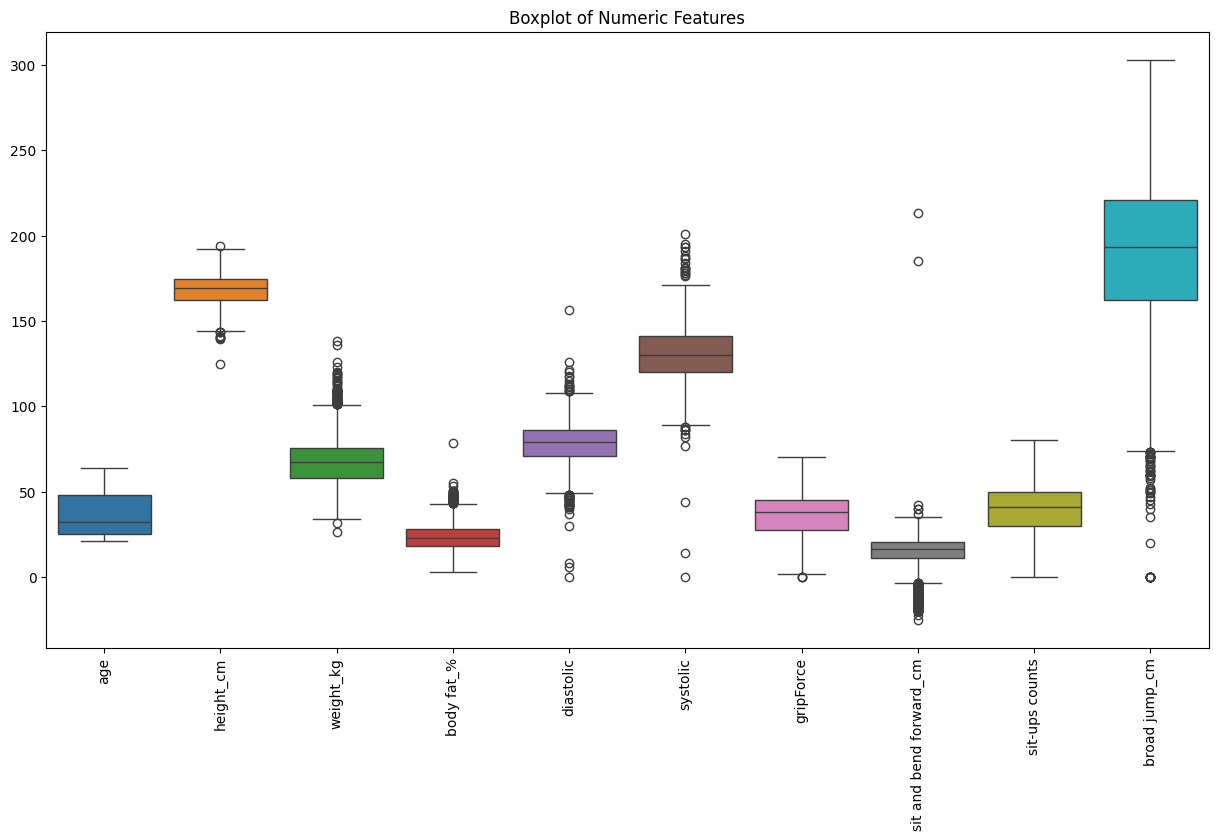

In [ ]:
# Boxplot of the numeric columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=90)
plt.show()

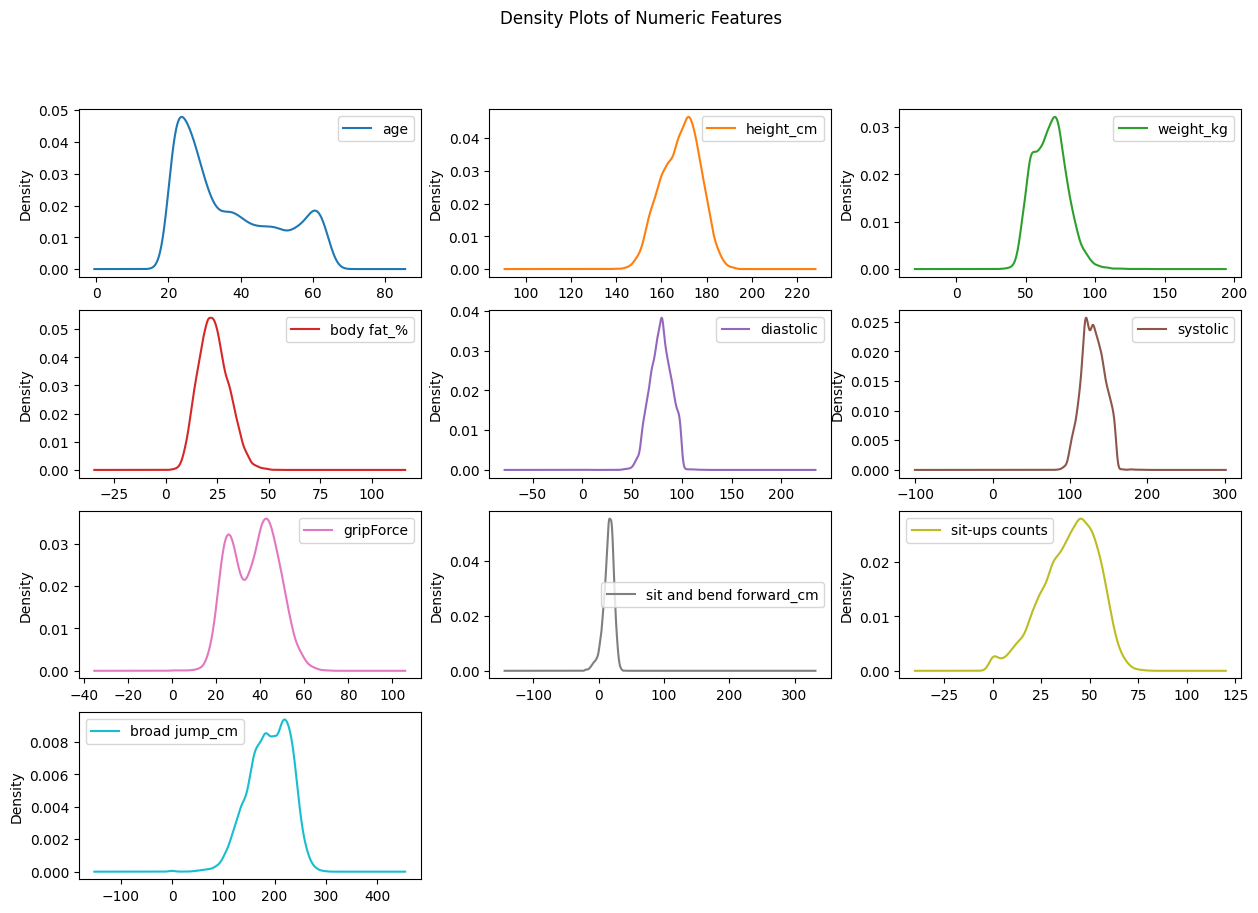

In [ ]:
# Density plots
df.select_dtypes(include=[np.number]).plot(kind='density', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False)
plt.suptitle("Density Plots of Numeric Features")
plt.show()

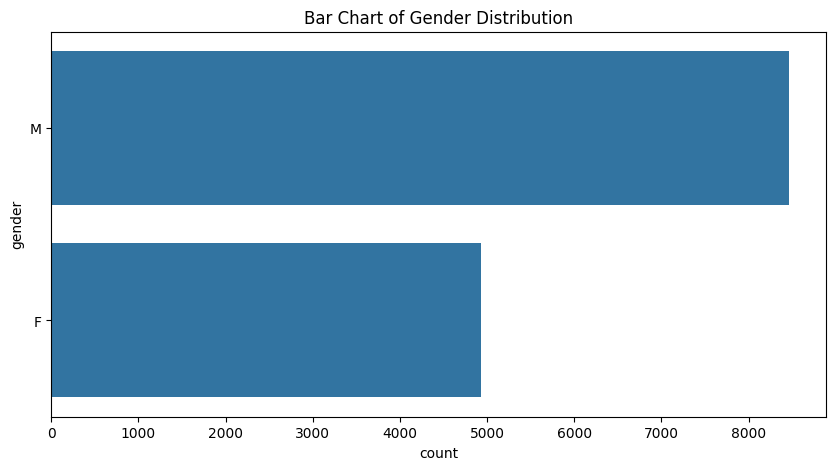

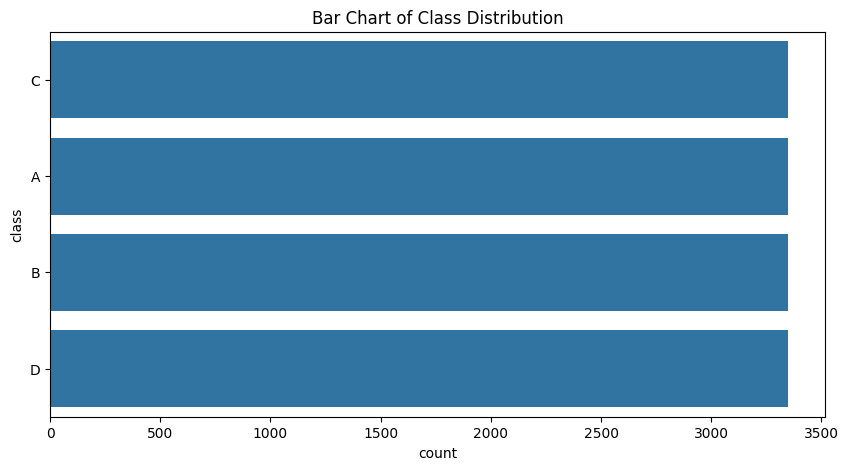

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(df['gender'])
plt.title("Bar Chart of Gender Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(df['class'])
plt.title("Bar Chart of Class Distribution")
plt.show()
